In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# data preprocessing:

In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [8]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

# histogram plot

Text(0.5, 0, 'price')

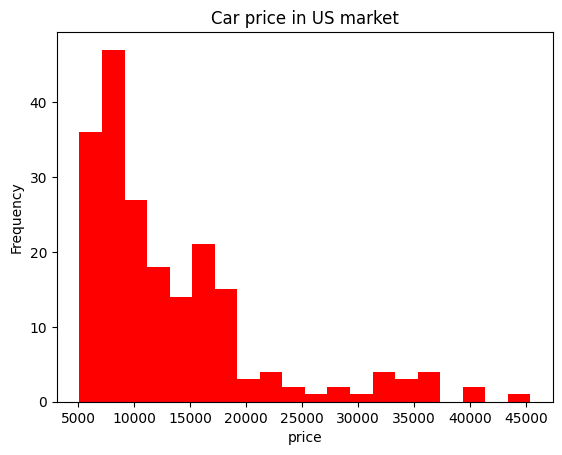

In [43]:
plot = df['price'].plot(kind='hist', 
                      bins=20, 
                      color="red",
                      title='Car price in US market')
plot.set_xlabel('price')

In [45]:
# car with highest price

highest_price=df.sort_values('price',ascending=False).iloc[0]
print(highest_price['CarName'])

buick regal sport coupe (turbo)


# box plot

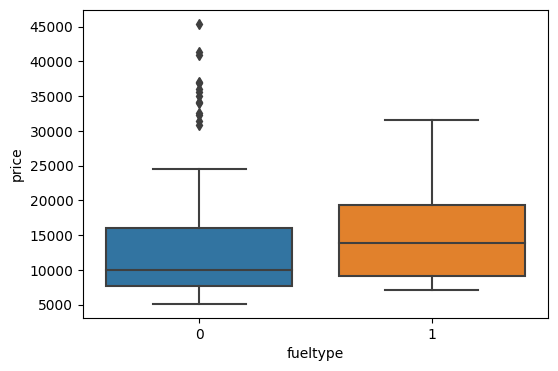

In [44]:

plt.figure(figsize = (6,4))
sns.boxplot(x= df["fueltype"],y=df["price"])
plt.show()


# examine the catagorical data

In [12]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [13]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [14]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [15]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [16]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [17]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [18]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [19]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

# encoding the catagorical data

In [20]:
df.replace({'doornumber':{'two':2,'four':4}},inplace=True)

In [21]:
df.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)
df.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
df.replace({'carbody':{'convertible':0,'hatchback':1,'sedan':2,'wagon':3,'hardtop':4}},inplace=True)
df.replace({'drivewheel':{'rwd':0,'fwd':1,'4wd':2}},inplace=True)
df.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
df.replace({'cylindernumber':{'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}},inplace=True)

In [22]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,0,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,0,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,1,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,2,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,4,2,0,0,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,0,1,4,2,0,0,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,0,4,2,0,0,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,1,4,2,0,0,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
#deleting unwanted column
column_to_drop=['car_ID','symboling','CarName','fuelsystem','carlength','wheelbase','enginetype']
new_df=df.drop(columns=column_to_drop,axis=1)
new_df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,2,0,0,0,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,2,0,0,0,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,2,1,0,0,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,0,4,2,1,0,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,0,4,2,2,0,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,4,2,0,0,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0,1,4,2,0,0,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0,0,4,2,0,0,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,1,1,4,2,0,0,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [24]:
df_corr = df[['doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 
        'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg', 'price']].corr()
df_corr


,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
doornumber,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.011082,0.160959,0.129533,0.182942,-0.055307,0.168790,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


# HEATMAP

<Axes: >

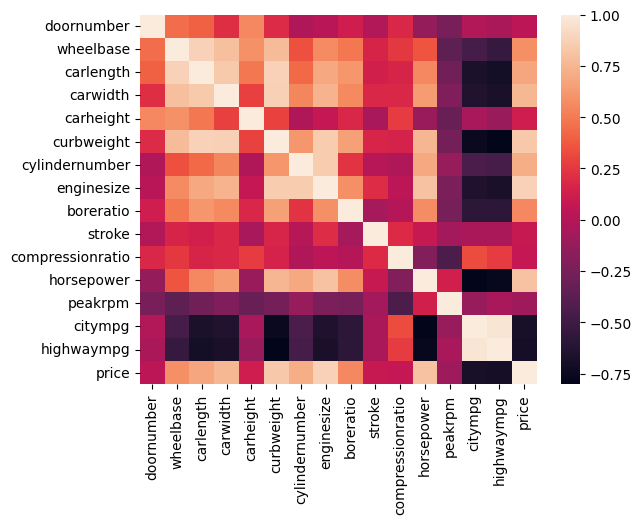

In [25]:
sns.heatmap(df_corr)

# PAIRPLOT

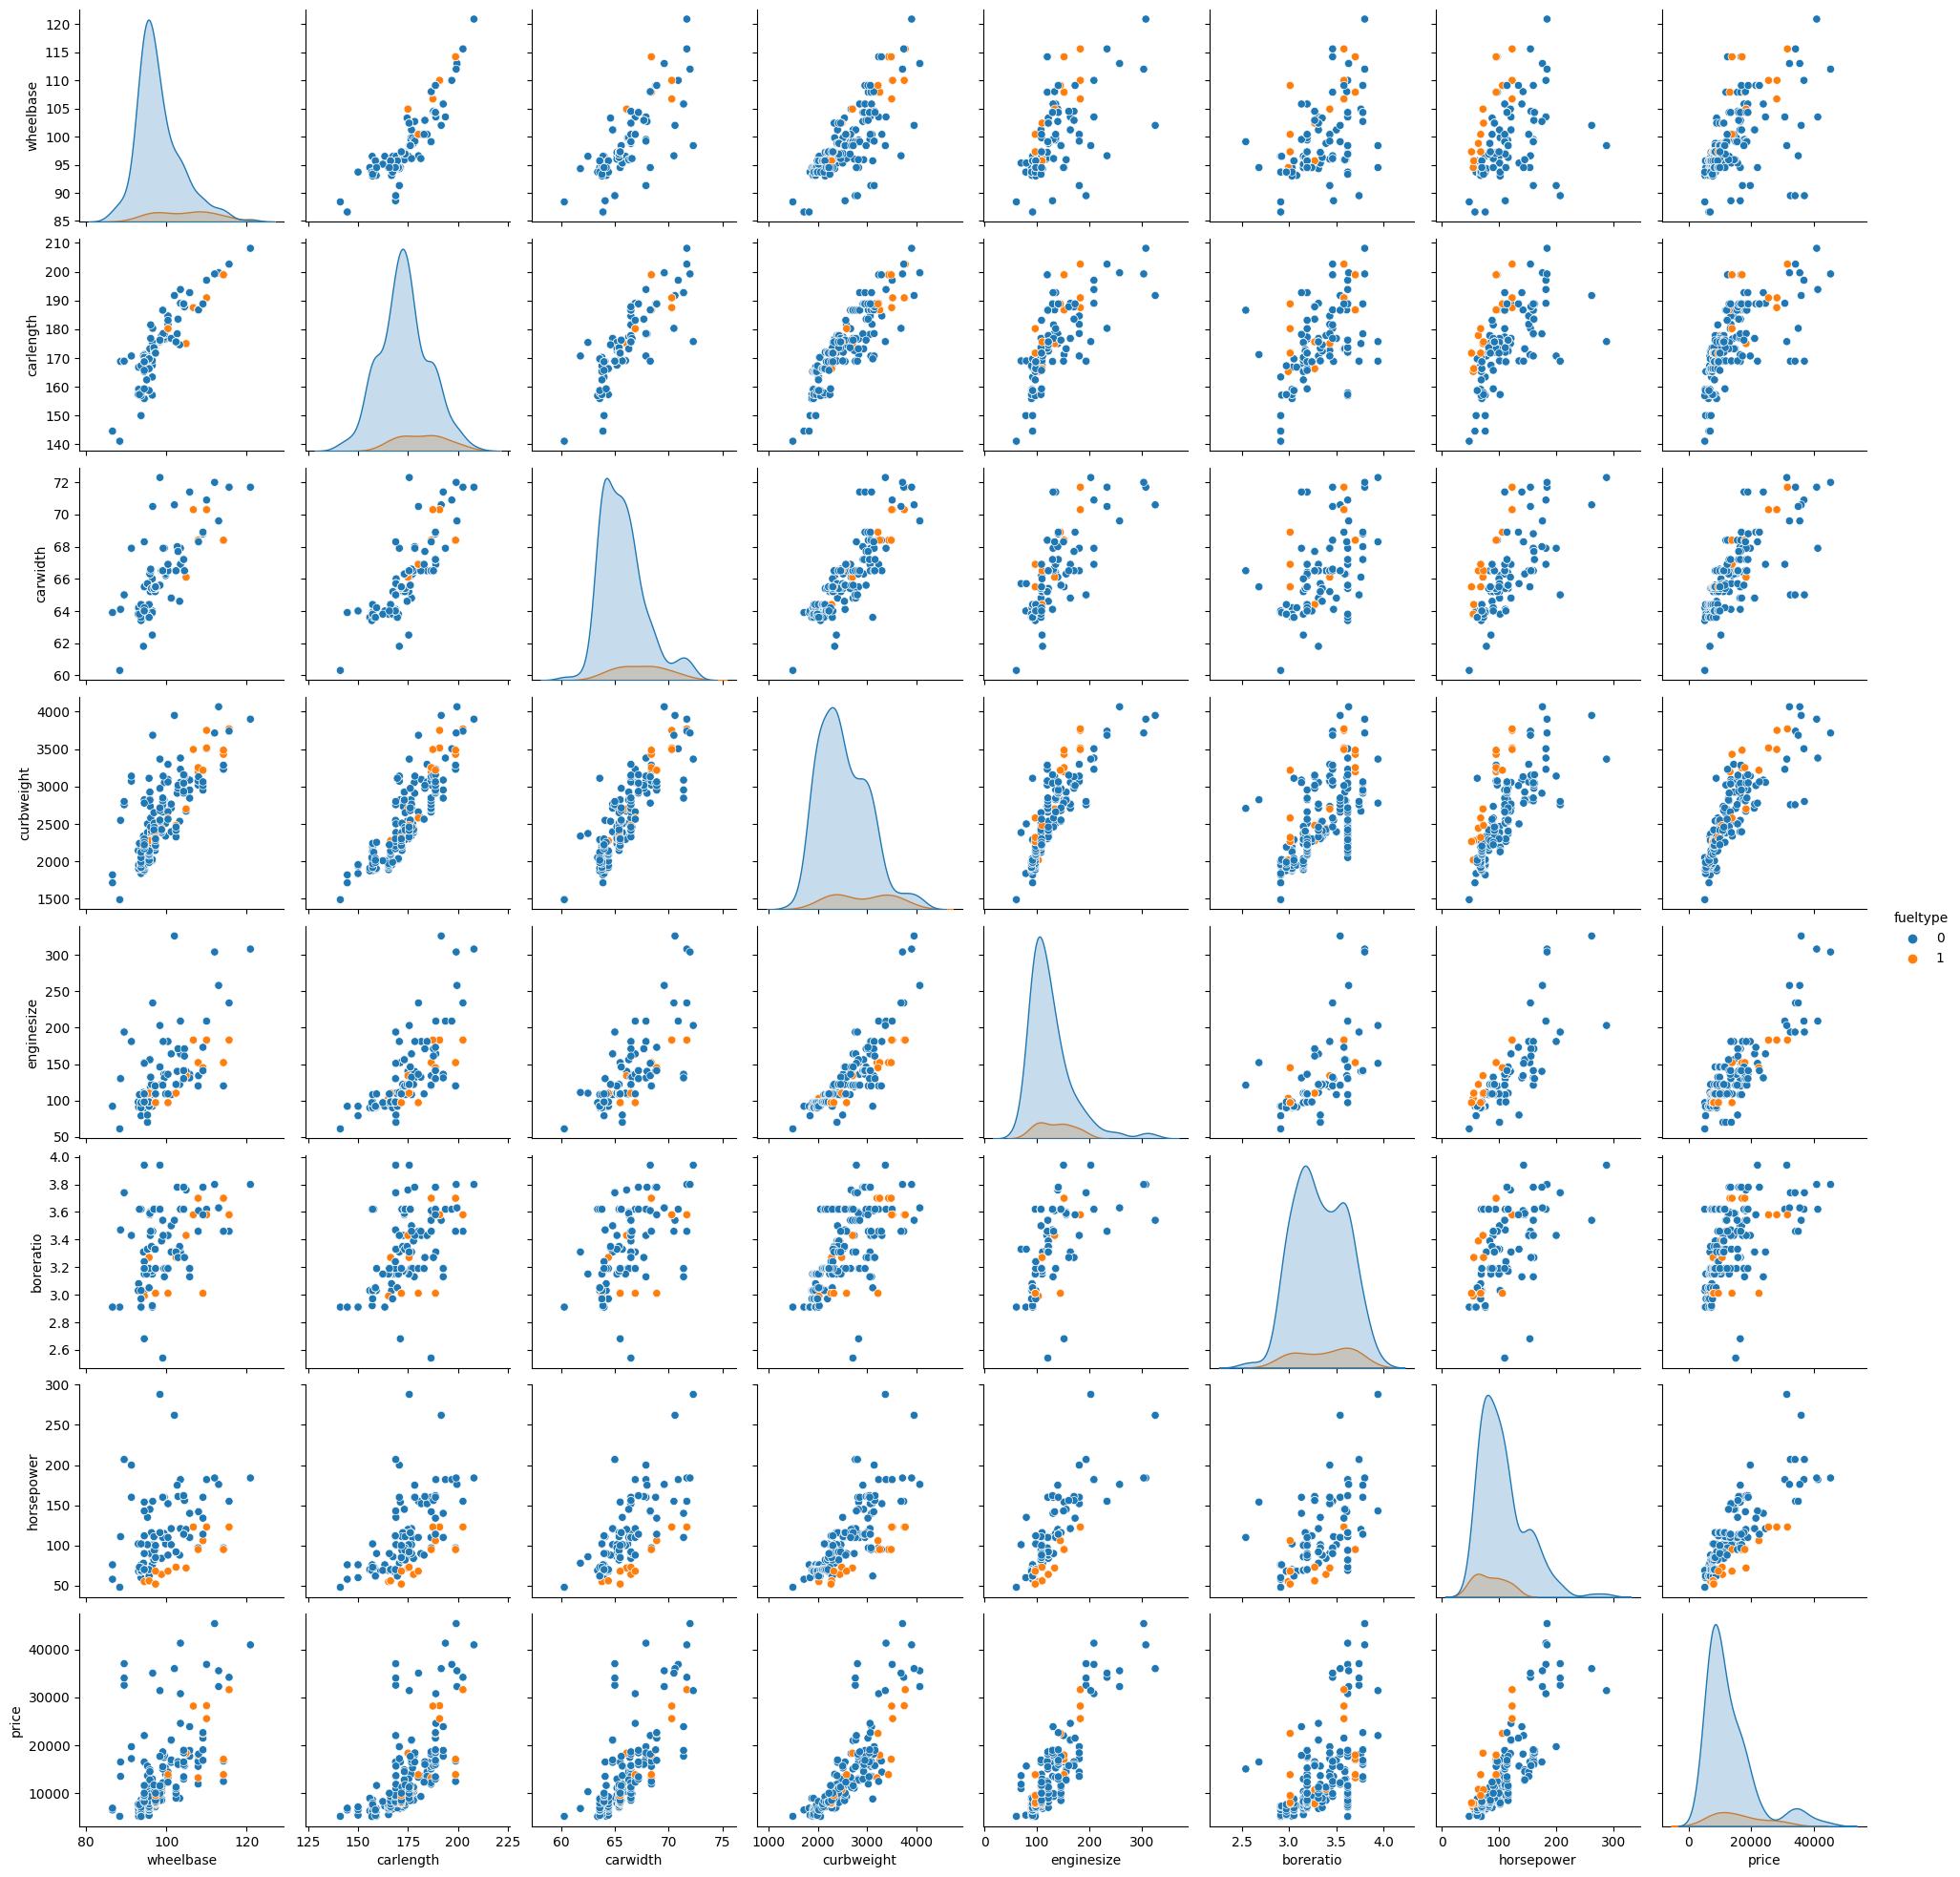

In [26]:
sns.pairplot(df, vars=['wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 
        'horsepower', 'price'],
            hue='fueltype')
plt.show()

In [27]:
scaler = StandardScaler()


scaled_data = scaler.fit_transform(new_df)
scaled_data

array([[-0.32879797, -0.46929532, -1.13038833, ..., -0.64655303,
        -0.54605874,  0.02739114],
       [-0.32879797, -0.46929532, -1.13038833, ..., -0.64655303,
        -0.54605874,  0.4044611 ],
       [-0.32879797, -0.46929532, -1.13038833, ..., -0.95301169,
        -0.69162706,  0.4044611 ],
       ...,
       [-0.32879797, -0.46929532,  0.88465174, ..., -1.10624102,
        -1.12833203,  1.02998314],
       [ 3.04138127,  2.13085442,  0.88465174, ...,  0.11959362,
        -0.54605874,  1.15358178],
       [-0.32879797,  2.13085442,  0.88465174, ..., -0.95301169,
        -0.83719538,  1.17303131]])

In [28]:
new_df.dtypes

fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber        int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# split into traing and testing

In [29]:
x = new_df.drop(columns=['price'])
y = new_df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)
reg = LinearRegression()

In [30]:
reg.fit(x_train,y_train)

LinearRegression()

# model evaluation

# prediction of training data

In [31]:
training_data_prediction=reg.predict(x_train)

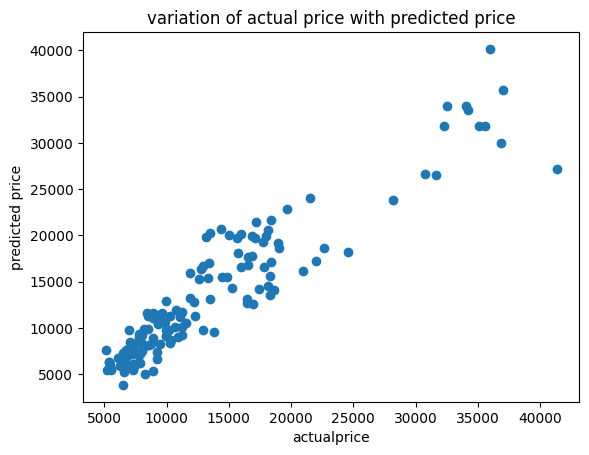

In [32]:
plt.scatter(x=y_train,y=training_data_prediction)
plt.xlabel('actualprice')
plt.ylabel('predicted price')
plt.title('variation of actual price with predicted price')
plt.show()

# prediction of testing data

In [33]:
testing_data_prediction=reg.predict(x_test)

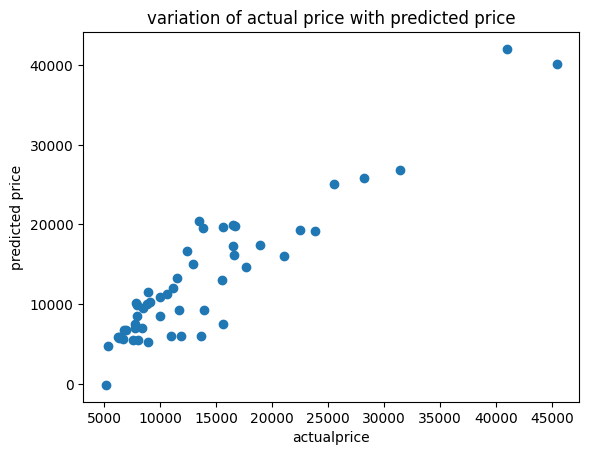

In [34]:
plt.scatter(x=y_test,y=testing_data_prediction)
plt.xlabel('actualprice')
plt.ylabel('predicted price')
plt.title('variation of actual price with predicted price')
plt.show()

In [35]:
y_pred = reg.predict(x_test)

In [36]:
mse=mean_squared_error(y_train,training_data_prediction)
mse

7410873.718410043

In [37]:
reg.score(x_test,y_test)

0.8430436385538974

In [38]:
len(reg.coef_)

1

In [39]:
np.sqrt(mse)

2722.2919972717923

In [40]:
reg.intercept_

array([-52821.40422411])

In [41]:
reg.coef_

array([[ 1.47008459e+04,  5.57479353e+02, -7.74943211e+01,
        -4.17651365e+02, -1.19595097e+03,  1.26920491e+04,
         6.81785636e+02,  3.16057552e+02,  2.48225882e+00,
        -3.07808419e+02,  1.43138492e+02, -3.07926089e+03,
        -3.55887740e+03, -1.01724752e+03, -1.05707991e+01,
         2.38210019e+00, -1.57864098e+02,  1.92816058e+02]])